# 05. Testes de Hipóteses
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 20px; right: 20px; border-radius: 5px;" />

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

Nos testes de hipóteses, define uma regra de decisão para rejeitar uma hipótese estatística com base nos elementos amostrais.

Para testar um parâmetro populacional, devemos afirmar, cuidadosamente, um par de hipóteses: uma que represente a afirmação e outra que represente o seu complemento. Quando uma dessas hipóteses for falsa, a outra deverá ser verdadeira. Essas duas hipóteses são chamadas de hipótese nula e hipótese alternativa.

**Importação das Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t as t_student

sns.set()

## <font color="blue">1. Teste de Normalidade</font>
***

**Carregando nosso dataset**

In [3]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/360d2eaa-970a-4204-8004-53bb42af101a.csv')

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<AxesSubplot:xlabel='Renda', ylabel='Count'>

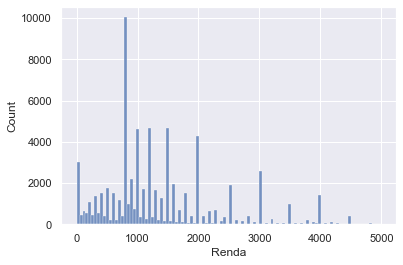

In [8]:
sns.histplot(df[df['Renda'] < 5000].Renda)

<AxesSubplot:xlabel='Altura', ylabel='Count'>

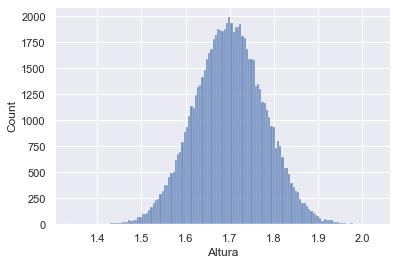

In [102]:
sns.histplot(df['Altura'])

<AxesSubplot:xlabel='Altura', ylabel='Count'>

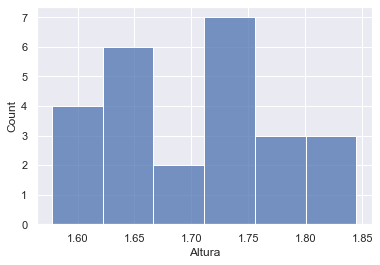

In [15]:
amostragem_altura = df.sample(25)['Altura']

sns.histplot(data=amostragem_altura)

((array([-4.28784822, -4.08650456, -3.97689807, ...,  3.97689807,
          4.08650456,  4.28784822]),
  array([1.33924461, 1.36949351, 1.38239037, ..., 2.0041846 , 2.01582958,
         2.02849676])),
 (0.07972030903162404, 1.6995124540575741, 0.9999867556174455))

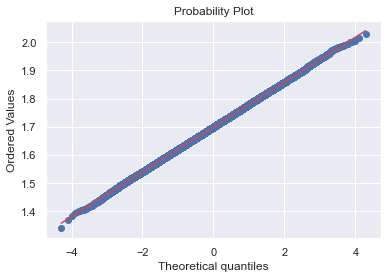

In [16]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(df['Altura'], dist = 'norm', plot = plt)

((array([-4.26891649, -4.06672304, -3.95662239, ...,  3.95662239,
          4.06672304,  4.26891649]),
  array([   0,    0,    0, ..., 4990, 4990, 4992], dtype=int64)),
 (911.4368799495991, 1348.917082294265, 0.9530358965960752))

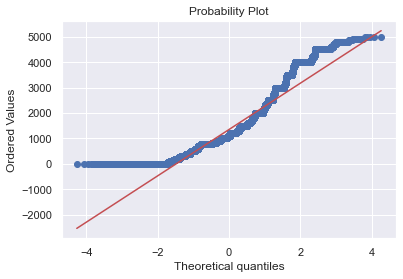

In [106]:
probplot(df[df['Renda'] < 5000].Renda, dist = 'norm', plot = plt)

### Importando a biblioteca
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [19]:
from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

- $H_0$: hipótese nula  
- $H_1$: hipótese alternativa

### Definindo a significância do teste ($\alpha$)

In [ ]:
confianca = 0.95

In [ ]:
significancia = 1 - confianca #0.05 5%

### Testando a variável Renda

In [20]:
normaltest(df['Renda'])

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

In [23]:
amostragem_renda = df.sample(25).Renda

normaltest(amostragem_renda)

NormaltestResult(statistic=10.021682601553632, pvalue=0.006665293430249059)

In [24]:
normaltest(df['Altura'])

NormaltestResult(statistic=0.19973093957002253, pvalue=0.9049591541967501)

In [25]:
amostragem_altura = df.sample(25)['Altura']
normaltest(amostragem_altura)

NormaltestResult(statistic=0.3861726775714768, pvalue=0.8244107924395129)

<AxesSubplot:xlabel='Altura', ylabel='Count'>

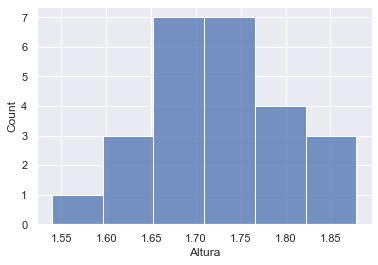

In [26]:
sns.histplot(amostragem_altura)

In [115]:
# estatística de teste
# p-valor (p-value)


### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq \alpha \, (0,05)$

In [3]:
# H0: a amostra segue uma distribuição normal ----- HIPÓTESE NULA
# H1: a amostra NÃO segue uma distribuição normal ----- HIPÓTESE ALTERNATIVA

In [116]:
if pvalue <= significancia:
    print ('RejeitaH0, ou seja, a amostra não segue uma distribuição normal.')
else:
    print('Aceita H0, ou seja, a amostra segue uma distribuição normal.')

RejeitaH0, ou seja, a amostra não segue uma distribuição normal.


### Testando a variável Altura

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

## <font color="blue">2. Etapas Básicas de um Teste</font>
***

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$

> ### <font color='red'>Pontos importantes</font>
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - Escolha da distribuição amostral adequada

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional não for desconhecido, deve-se utilizar a distribuição t de Student.

<img style="display: block; margin: 25px auto" src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - Fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> <img alt="Níveis de Confiança e significância" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png" style="display: block; margin: 25px auto" />
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> <img alt="Áreas de Aceitação e Rejeição" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" style="display: block; margin: 25px auto; border-radius: 10px" />

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

---

## <font color=blue>3. TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

### <font color=blue>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml, ao nível de significância de 5%?**

---

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [27]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [28]:
# Passar para um dataframe
dados = pd.DataFrame({ 'Volume': amostra })

In [5]:
dados.head()

,Volume
0,509
1,505
2,495
3,510
4,496


In [29]:
dados.mean()

Volume    503.24
dtype: float64

In [30]:
# Média da amostra
media_amostral = dados["Volume"].mean()

media_amostral

503.24

In [31]:
# Desvio padrão (amostral)
desvio_amostral = dados["Volume"].std()
desvio_amostral

4.483803050527348

In [36]:
# definindo os demais dados do problema
u0 = 500
n = len(dados)
n

50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500 \, ml$

### $H_1: \mu \neq 500 \, ml$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [32]:
significancia = 0.05
confianca = 0.95

### Obtendo $z_{\alpha/2}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [33]:
z_alpha_2 = norm.ppf(confianca + significancia / 2)
z_alpha_2

1.959963984540054

<img style="border-radius: 10px" alt="Região de Aceitação" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png" />

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [37]:
z = (media_amostral - u0) / (desvio_amostral / np.sqrt(n))
z # Estatística de teste

5.109559775991876

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=100%>

### <font color='green'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [38]:
z <= -z_alpha_2 or z >= z_alpha_2

True

### <font color='orange'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='green'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [39]:
p_value = norm.sf(5.11) * 2
p_value

3.221588122442738e-07

In [16]:
if p_value <= significancia:
    print('Rejeita o H0, ou seja, a hipótese nula => A média do volume das embalagens de suco NÃO é igual a 500 ml')
else:
    print('Aceita o H0, ou seja, a hipótese nula => A média do volume das embalagens de suco É igual a 500 ml')

Rejeita o H0, ou seja, a hipótese nula => A média do volume das embalagens de suco NÃO é igual a 500 ml


https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [18]:
from statsmodels.stats.weightstats import ztest

In [20]:
dados.head()

,Volume
0,509
1,505
2,495
3,510
4,496


In [22]:
ztest(x1=dados['Volume'], value=500, alternative='two-sided')

(5.109559775991873, 3.229103172445771e-07)

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [23]:
from statsmodels.stats.weightstats import DescrStatsW

In [24]:
teste = DescrStatsW(dados['Volume'])

In [25]:
teste.ztest_mean(value=500)

(5.109559775991874, 3.2291031724457596e-07)

---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

### 3.2.1. Conhecendo a Distribuição $t$-student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

### Propriedades

- A função densidade da distribuição t de Student tem a mesma forma em sino da distribuição Normal, mas reflete a maior variabilidade (com curvas mais alargadas) que é de se esperar em amostras pequenas.
- Quanto maior o grau de liberdade, mais a distribuição t de Student se aproxima da distribuição Normal.

---

### 3.2.2. Teste Unicaudal

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [26]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [27]:
len(amostra)

25

In [28]:
# Converter para um DataFrame
dados = pd.DataFrame({ 'gramas': amostra })

In [34]:
# Visualização
dados.head()

,gramas
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49


In [33]:
# media amostral
media_amostral = dados.gramas.mean()
media_amostral

36.2504

In [35]:
# desvio padrão amostral
desvio_amostral = dados.gramas.std()
desvio_amostral

0.9667535018469455

In [36]:
# número de amostras e número de graus de liberdade
n = len(dados)
gl = n - 1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37 \, g$

### $H_1: \mu > 37 \, g$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - Fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [37]:
significancia = 0.05
confianca = 1 - significancia

### Obtendo $t_{\alpha}$

In [38]:
from scipy.stats import t as t_student

In [41]:
t_alpha = t_student.ppf(0.95, df=gl)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [42]:
t = (media_amostral - 37) / (desvio_amostral / np.sqrt(n))
t

-3.876893119952081

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

In [ ]:
# Aceito a hipótese a nula

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [43]:
t > t_alpha

False

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do $p$ valor</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [44]:
p_value = t_student.sf(t, df=gl)

In [45]:
p_value

0.9996406170303819

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [48]:
dados.gramas.size

25

In [46]:
teste = DescrStatsW(dados.gramas)

In [117]:
# ztest_mean: Distribuição Normal
# ttest_mean: Distribuição t-Student

In [47]:
teste.ttest_mean(value=37, alternative='larger')

(-3.8768931199520447, 0.9996406170303819, 24.0)

---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [49]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/360d2eaa-970a-4204-8004-53bb42af101a.csv')

In [50]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [53]:
homens = df[df['Sexo'] == 0].sample(n=500, random_state=101)

In [54]:
mulheres = df.query('Sexo == 1').sample(n=500, random_state=101)

In [56]:
homens.shape

(500, 7)

In [57]:
mulheres.shape

(500, 7)

### Obtendo dados do problema

- Média e desvio padrão das mulheres
- Média e desvio padrão dos homens
- Número de amostras (homens e mulheres)
- Nível de significância e confiança

In [60]:
media_H = homens.Renda.mean()
desvio_H = homens.Renda.std()

media_H, desvio_H

(2142.608, 2548.0508024998717)

In [61]:
media_M = mulheres.Renda.mean()
desvio_M = mulheres.Renda.std()

media_M, desvio_M

(1357.528, 1569.901190748458)

In [69]:
nH = len(homens)
nM = len(mulheres)
D0 = 0

In [63]:
significancia = 0.01

In [64]:
confianca = 1 - significancia

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### <font color='red'><strong>Observação importante</strong></font>

> **Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$**

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Diferenças entre `ppf`, `cdf` e `sf`

1. `ppf`: **passamos um valor de probabilidade** e ele **retorna um valor no eixo** `z` (norm) ou `t` (t_student).
    - Quando estamos com uma Normal/t-Student bicaudal, então, passamos $\beta + \alpha / 2$
    - Quando estamos com uma Normal/t-Student unicaudal à esquerda (confiança), então, passamos somente o $\beta$
    - Quando estamos com uma Normal/t-Student unicaudal à direita (confiança), então, passamos somente o $\alpha$
2. `cdf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à esqueda do valor passado como parâmetro.
3. `sf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à direita do valor passado como parâmetro.

#### Legenda
- $\beta$: confiança
- $\alpha$: significância

In [68]:
z_alpha = norm.ppf(confianca)
z_alpha

2.3263478740408408

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [70]:
numerador = (media_H - media_M) - D0
denominador = np.sqrt((desvio_H **2 / nH) + (desvio_M**2 / nM))

In [71]:
z = numerador / denominador
z

5.8656200577647555

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [72]:
p_value = norm.sf(z)

In [73]:
p_value

2.2372867859458094e-09

In [75]:
p_value <= 0.01 # Rejeita H0

True

### Facilitando os cálculos com o Python
---

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.html

In [76]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

**Utilizando o CompareMeans**

In [77]:
teste_homens = DescrStatsW(homens.Renda)

In [78]:
teste_mulheres = DescrStatsW(mulheres.Renda)

In [79]:
teste = CompareMeans(teste_homens, teste_mulheres)

In [80]:
teste.ztest_ind(alternative='larger', value=D0)

(5.865620057764754, 2.2372867859458255e-09)

---

# <font color=blue>4. TESTES NÃO PARAMÉTRICOS</font>
***

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **COROA** voltada para cima?

### <font color=blue>4.1 Teste do Qui-Quadrado ( $\chi^2$)</font>
***

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

### Dados do problema

In [4]:
F_observada = [17, 33]
F_esperada = [25, 25]

significancia = 0.05
confianca = 1 - significancia

k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: F_{CARA} = F_{COROA}$

### $H_1: F_{CARA} \neq F_{COROA}$

---

### **Passo 2** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

In [5]:
significancia

0.05

In [7]:
confianca

0.95

### Obtendo $\chi_{\alpha}^2$

In [15]:
from scipy.stats import chi2

In [16]:
chi_2_alpha = chi2.ppf(confianca, df=graus_de_liberdade)

In [17]:
chi_2_alpha

3.841458820694124

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

---

### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [18]:
chi2_teste = 0

for i in range(k):
    chi2_teste += (F_observada[i] - F_esperada[i])**2 / F_esperada[i]
    
chi2_teste

5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [19]:
chi2_teste > chi_2_alpha

True

### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [21]:
p_value = chi2.sf(chi2_teste, df=graus_de_liberdade)

In [22]:
p_value

0.023651616655356

In [23]:
p_value <= significancia

True

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [24]:
from scipy.stats import chisquare

In [25]:
chisquare(F_observada, F_esperada)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

---

## <font color='red'>Problema</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

## <font color=green>4.2 Teste Wilcoxon</font>
### Comparação de duas populações - amostras dependentes
***

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

### Dados do problema

In [29]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}

In [30]:
confianca = 0.95
significancia = 1 - confianca
n = 35

In [31]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [32]:
from scipy.stats import normaltest

In [33]:
normaltest(fumo.Antes)

NormaltestResult(statistic=15.652924739801158, pvalue=0.0003990346232004849)

In [5]:
media_antes = fumo.Antes.mean()
media_antes

31.857142857142858

In [6]:
media_depois = fumo.Depois.mean()
media_depois

11.2

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} \neq \mu_{depois}$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 20?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $z_{\alpha/2}$

In [145]:
z_alpha_2 = norm.ppf(confianca + significancia / 2)

In [146]:
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

## $T$ = menor das somas de postos de mesmo sinal

# $$\mu_T = \frac{n(n+1)}{4}$$
# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Construindo a tabela com os postos

In [147]:
fumo

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14
5,52,16
6,21,13
7,29,12
8,10,19
9,22,17


In [148]:
fumo['Diff'] = fumo.Depois - fumo.Antes

In [149]:
fumo.head()

,Antes,Depois,Diff
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1


In [150]:
fumo['|Diff|'] = fumo['Diff'].abs()

In [151]:
fumo.head()

,Antes,Depois,Diff,|Diff|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1


In [152]:
fumo.sort_values(by='|Diff|', inplace=True)
fumo.head()

,Antes,Depois,Diff,|Diff|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4


In [153]:
fumo['Posto'] = range(1, len(fumo) + 1)
fumo.head()

,Antes,Depois,Diff,|Diff|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5


In [154]:
posto = fumo[['|Diff|', 'Posto']].groupby('|Diff|').mean()
posto

,Posto
|Diff|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [155]:
posto.reset_index(inplace=True)
posto

,|Diff|,Posto
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


In [156]:
fumo.drop('Posto', axis=1, inplace=True)
fumo.head()

,Antes,Depois,Diff,|Diff|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4


In [157]:
fumo = fumo.merge(posto, left_on='|Diff|', right_on='|Diff|', how='left')
fumo

,Antes,Depois,Diff,|Diff|,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


In [158]:
fumo['Posto (+)'] = fumo.apply(lambda x: x.Posto if x.Diff > 0 else 0, axis=1)
fumo.head()

,Antes,Depois,Diff,|Diff|,Posto,Posto (+)
0,13,14,1,1,1.5,1.5
1,17,16,-1,1,1.5,0.0
2,17,19,2,2,3.0,3.0
3,12,16,4,4,4.5,4.5
4,14,18,4,4,4.5,4.5


In [159]:
fumo['Posto (-)'] = fumo.apply(lambda x: x.Posto if x.Diff < 0 else 0, axis=1)
fumo.head()

,Antes,Depois,Diff,|Diff|,Posto,Posto (+),Posto (-)
0,13,14,1,1,1.5,1.5,0.0
1,17,16,-1,1,1.5,0.0,1.5
2,17,19,2,2,3.0,3.0,0.0
3,12,16,4,4,4.5,4.5,0.0
4,14,18,4,4,4.5,4.5,0.0


In [160]:
fumo.drop('Posto', axis=1, inplace=True)
fumo.head()

,Antes,Depois,Diff,|Diff|,Posto (+),Posto (-)
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0


### Obter $T$

## $T$ = menor das somas de postos de mesmo sinal

In [161]:
T = min(fumo['Posto (+)'].sum(), fumo['Posto (-)'].sum())
T

22.0

### Obter $\mu_T$

# $$\mu_T = \frac{n(n+1)}{4}$$


In [162]:
mu_T = (n * (n + 1)) / 4
mu_T

315.0

### Obter $\sigma_T$

# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [163]:
sigma_T = np.sqrt((n * (n + 1) * ((2 * n) + 1)) / 24)
sigma_T

61.053255441458646

### Obter $Z_{teste}$

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

In [164]:
Z = (T - mu_T) / sigma_T
Z

-4.799088891843698

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [165]:
Z <= z_alpha_2 or Z >= z_alpha_2

True

In [166]:
if (Z <= z_alpha_2 or Z >= z_alpha_2):
    print('Rejeita H0, ou seja, existe uma diferença entre os grupos.')
else:
    print('Aceita H0, ou seja, os grupos não apresentam diferença.')

Rejeita H0, ou seja, existe uma diferença entre os grupos.


### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [167]:
pvalue = 2 * norm.cdf(Z)

In [168]:
pvalue

1.5938904538674004e-06

In [169]:
pvalue <= significancia

True

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [34]:
from scipy.stats import wilcoxon

In [37]:
T, pvalue = wilcoxon(x=fumo.Antes, y=fumo.Depois)

In [38]:
if pvalue <= significancia:
    print('Rejeita H0')
else:
    print('Aceita H0')

Rejeita H0


---